In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [12]:
data_1 = pd.read_csv('D:\Guvi Assesment\Task 5/takehome_user_engagement.csv')
data_2 = pd.read_csv('D:\Guvi Assesment/takehome_users.csv',encoding = 'latin')


In [13]:
data_1.head()

time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1

In [15]:
data_1.shape

(207917, 3)

In [16]:
data_1.describe()

user_id   visited
count  207917.000000  207917.0
mean     5913.314197       1.0
std      3394.941674       0.0
min         1.000000       1.0
25%      3087.000000       1.0
50%      5682.000000       1.0
75%      8944.000000       1.0
max     12000.000000       1.0

In [21]:
data_1.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [28]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [22]:
data_2.head()

object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  
0             10803.0  
1               316.0  
2              1525.0  
3              5151.0  
4              5240.0

In [23]:
data_2.shape

(12000, 10)

In [24]:
data_2.describe()

object_id  last_session_creation_time  opted_in_to_mailing_list  \
count  12000.00000                8.823000e+03              12000.000000   
mean    6000.50000                1.379279e+09                  0.249500   
std     3464.24595                1.953116e+07                  0.432742   
min        1.00000                1.338452e+09                  0.000000   
25%     3000.75000                1.363195e+09                  0.000000   
50%     6000.50000                1.382888e+09                  0.000000   
75%     9000.25000                1.398443e+09                  0.000000   
max    12000.00000                1.402067e+09                  1.000000   

       enabled_for_marketing_drip        org_id  invited_by_user_id  
count                12000.000000  12000.000000         6417.000000  
mean                     0.149333    141.884583         5962.957145  
std                      0.356432    124.056723         3383.761968  
min                      0.000000      0.000000            3.000000  
25%                      0.000000     29.000000         3058.000000  
50%                      0.000000    108.000000         5954.000000  
75%                      0.000000    238.250000         8817.000000  
max                      1.000000    416.000000        11999.000000

In [26]:
data_2.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [29]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


# Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period


In [30]:
# Changing the time stamp in dataframe to pandas datetime format 

data_1['time_stamp']=pd.to_datetime(data_1['time_stamp'])

In [31]:
# Grouping the users as per weekly and finding the visit count as per weekly time frame


g= data_1.groupby('user_id')
date=g.rolling('7D', on='time_stamp')['visited'].count()
date=date.to_frame().reset_index()

In [32]:
date

user_id          time_stamp  visited
0             1 2014-04-22 03:53:30      1.0
1             2 2013-11-15 03:45:04      1.0
2             2 2013-11-29 03:45:04      1.0
3             2 2013-12-09 03:45:04      1.0
4             2 2013-12-25 03:45:04      1.0
...         ...                 ...      ...
207912    11996 2013-09-06 06:14:15      1.0
207913    11997 2013-01-15 18:28:37      1.0
207914    11998 2014-04-27 12:45:16      1.0
207915    11999 2012-06-02 11:55:59      1.0
207916    12000 2014-01-26 08:57:12      1.0

[207917 rows x 3 columns]

In [33]:
# Finding the adopted user who has logged into the product on three seperate days in atleast 7 days period

def adp_user(adopted):
  adopted=adopted.groupby('user_id')['visited'].max().reset_index()
  adopted_user=adopted
  adopted_user['adopted_user']=adopted['visited'].apply(lambda x: 1 if x>=3 else 0)
  return adopted_user
adopted_user=adp_user(date)

In [36]:
adopted_user

user_id  visited  adopted_user
0           1      1.0             0
1           2      3.0             1
2           3      1.0             0
3           4      1.0             0
4           5      1.0             0
...       ...      ...           ...
8818    11996      1.0             0
8819    11997      1.0             0
8820    11998      1.0             0
8821    11999      1.0             0
8822    12000      1.0             0

[8823 rows x 3 columns]

In [38]:
adopted_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       8823 non-null   int64  
 1   visited       8823 non-null   float64
 2   adopted_user  8823 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 206.9 KB


In [40]:
adopted_user.adopted_user.value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [41]:
adopted_user.drop('visited',axis=1,inplace=True)
adopted_user.rename({'user_id':'object_id'},axis=1,inplace=True)
adopted_user.set_index("object_id", inplace = True)

In [43]:
# Merging the takehome_user file (i.e) data_2 with the adopted user

new_data=data_2.join(adopted_user,how='left',on='object_id')
new_data.info()
     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                8823 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.0+ MB


In [44]:
new_data.fillna(0,inplace=True)

In [45]:
new_data['last_session_creation_time'] =  new_data['last_session_creation_time'].apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))
new_data['last_session_creation_time'] = pd.to_datetime(new_data['last_session_creation_time'])

In [46]:
new_data.head()

object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 09:23:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 09:15:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-20 04:44:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 13:39:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 15:44:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  adopted_user  
0             10803.0           0.0  
1               316.0           1.0  
2              1525.0           0.0  
3              5151.0           0.0  
4              5240.0           0.0

In [47]:

new_data['creation_time'] = new_data['creation_time'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
new_data['creation_time'] = pd.to_datetime(new_data['creation_time'])
new_data.head()

object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 09:23:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 09:15:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-20 04:44:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 13:39:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 15:44:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  adopted_user  
0             10803.0           0.0  
1               316.0           1.0  
2              1525.0           0.0  
3              5151.0           0.0  
4              5240.0           0.0

In [48]:
src=list(new_data['creation_source'].unique())
for i in range(len(src)):  
    new_data['creation_source']=new_data['creation_source'].replace({src[i]:i})

In [49]:
new_data.head()

object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email  creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com                0        2014-04-22 09:23:30   
1      MatthewPoole@gustr.com                1        2014-03-31 09:15:04   
2  MitchellBottrill@gustr.com                1        2013-03-20 04:44:52   
3   NicklasSClausen@yahoo.com                0        2013-05-22 13:39:28   
4          GraceRaw@yahoo.com                0        2013-01-22 15:44:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  adopted_user  
0             10803.0           0.0  
1               316.0           1.0  
2              1525.0           0.0  
3              5151.0           0.0  
4              5240.0           0.0

In [50]:
# Finding the active days

new_data['active_days']=(new_data['last_session_creation_time'].sub(new_data['creation_time'])).dt.days
col =new_data.pop('active_days')
new_data.insert(9,'active_days', col)
for i in range(len(new_data['active_days'])):
   if new_data['active_days'][i]<0:
      new_data['active_days'][i]=0
new_data.head()

C:\Users\Tamilarasu16\AppData\Local\Temp\ipykernel_18548\578702709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['active_days'][i]=0


object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email  creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com                0        2014-04-22 09:23:30   
1      MatthewPoole@gustr.com                1        2014-03-31 09:15:04   
2  MitchellBottrill@gustr.com                1        2013-03-20 04:44:52   
3   NicklasSClausen@yahoo.com                0        2013-05-22 13:39:28   
4          GraceRaw@yahoo.com                0        2013-01-22 15:44:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  active_days  \
0                         1                           0      11            0   
1                         0                           0       1          136   
2                         0                           0      94            0   
3                         0                           0       1            1   
4                         0                           0     193            5   

   invited_by_user_id  adopted_user  
0             10803.0           0.0  
1               316.0           1.0  
2              1525.0           0.0  
3              5151.0           0.0  
4              5240.0           0.0

In [51]:
# Finding the correlation between all the columns with respect to the adopted user

new_data.corr()['adopted_user']

C:\Users\Tamilarasu16\AppData\Local\Temp\ipykernel_18548\506361437.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.corr()['adopted_user']


object_id                     0.005750
creation_source              -0.029121
opted_in_to_mailing_list      0.008097
enabled_for_marketing_drip    0.004653
org_id                        0.064523
active_days                   0.797344
invited_by_user_id            0.021596
adopted_user                  1.000000
Name: adopted_user, dtype: float64

In [52]:
# EDA - Exploratory Data Analysis

sns.pairplot(new_data, hue="adopted_user",height=7)
plt.show()

In [91]:
figure=plt.figure(figsize=(10,10))
sns.scatterplot(new_data['active_days'])
sns.scatterplot(new_data['object_id'])
sns.scatterplot(new_data['adopted_user'])
plt.show()

In [65]:
fig=plt.figure(figsize=(10,10))
plt.hist(new_data.active_days[new_data['adopted_user']==1],color='green')
plt.hist(new_data.active_days[new_data['adopted_user']==0],color='purple')
plt.xlabel("active_days")
plt.ylabel("frequency")
plt.ylim(0,2000)
plt.show()

In [69]:
# object id with more active time are mostly adopted users and more active days has more adopted users

arr=list(data_2.creation_source.unique())
ind = np.arange(len(arr)) 

In [70]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x='creation_source', data=new_data,hue='adopted_user', palette='Set2')
plt.xticks(ind,labels=arr,rotation=60)
plt.show()

In [71]:
# Noe lets try logistic regression to find the important features

import statsmodels.api as sm

In [72]:
x=new_data[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','active_days','invited_by_user_id']]
y=new_data['adopted_user']

In [73]:
x_cons=sm.add_constant(x)

In [74]:
x_log=sm.Logit(y,x_cons)
res_log=x_log.fit()
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.073924
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           adopted_user   No. Observations:                12000
Model:                          Logit   Df Residuals:                    11993
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.8119
Time:                        14:21:28   Log-Likelihood:                -887.09
converged:                       True   LL-Null:                       -4715.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.0893      0.233    -21.834      0.000      -5.546      -4.632
creation_source                0.0019      0.071      0.026      0.979      -0.137       0.141
opted_in_to_mailing_list       0.2305      0.183      1.261      0.207      -0.128       0.589
enabled_for_marketing_drip    -0.1287      0.223     -0.578      0.563      -0.565       0.308
org_id                         0.0012      0.001      2.170      0.030       0.000       0.002
active_days                    0.0629      0.002     34.602      0.000       0.059       0.067
invited_by_user_id          1.611e-05   2.36e-05      0.683      0.495   -3.01e-05    6.23e-05
==============================================================================================
"""

In [80]:
print("The following are the Regression Coefficients:'\n\n")
r=res_log.params[1:]
print(res_log.params[1:],'\n\n')
con_mat=res_log.pred_table()
con_mat
print('***********************************************************')
print("The following are the Accuracy on training data:'\n\n")
accuracy_train=100*(con_mat[0,0]+con_mat[1,1])/con_mat.sum()
print("Accuracy : ",accuracy_train)

The following are the Regression Coefficients:'


creation_source               0.001879
opted_in_to_mailing_list      0.230458
enabled_for_marketing_drip   -0.128720
org_id                        0.001196
active_days                   0.062945
invited_by_user_id            0.000016
dtype: float64 


***********************************************************
The following are the Accuracy on training data:'


Accuracy :  97.45833333333333


In [81]:
result=r.to_frame().reset_index()
a=list(result['index'])
b=list(result[0])

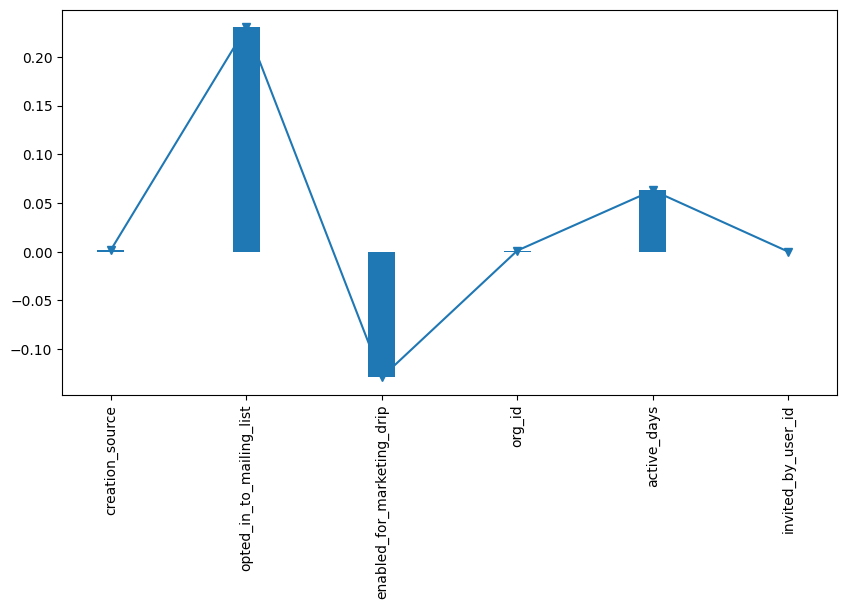

In [82]:
fig=plt.figure(figsize=(10,5),dpi=100)
plt.plot(a,b,marker='v')
plt.bar(a,b,width=0.2)
plt.xticks(rotation=90)
plt.show()
     

In [85]:
# To find accuracy and regression coefficients

print("The following are the Accuracy on training data:'\n\n")
print("Accuracy : ",accuracy_train,'\n\n')
print('***********************************************')
print('The following are the Regression Coefficients:''\n\n')
print(res_log.params[1:])
     

The following are the Accuracy on training data:'


Accuracy :  97.45833333333333 


***********************************************
The following are the Regression Coefficients:


creation_source               0.001879
opted_in_to_mailing_list      0.230458
enabled_for_marketing_drip   -0.128720
org_id                        0.001196
active_days                   0.062945
invited_by_user_id            0.000016
dtype: float64


# Conclusion 

So, from the above datas its clear that the Opting_into_mailing_list and and active days increases the odds of being adopted user and creation_source,org_id and invited by user only has minimum impact in increasing the odds of adopted user.Then enabling_for marketing_drip has odds of not being an adopted user.

